### 1. The difference between the Adeline rule and Rosenblatt’s perceptron

|Adeline rule    |Rosenblatt’s perceptron  |
|-----------------|------------------------------|
|The linear activation function is a real number |The linear activation function is an integer class label|
|The weight update is calculated based on all samples in the training set | the weights update is calculated incrementally after each sample (uses continuous predicted values)|


### 2. The advantages of taking a continuous linear activation function

- The continuous linear activation function has the advantage that the
corresponding cost function becomes differentiable.
- it tells us by “how much” we were right or wrong

### 3. The step size
In each iteration, the step size is determined by the value of the learning rate as well as the slope of the gradient.

### 4. The hyperparameters of the Perceptron and Adaline learning algorithms

The learning Rate : η and the number of epochs
#### Perceptron :
- If η is too small, the algorithm will be slow because the updates
won’t make much progress.
- If η is too large, the algorithm will be slow because the updates
will “overshoot” and may cause previously correct
classifications to become incorrect

#### Adaline :
- If η is to small: a large number of epochs
is required to converge : algo too slow
- If η is to large: overshoot the minimum
and algo will diverge

### 5. Feature scaling
Feature scaling is very important for optimal performance. Gradient descent is one of the many algorithms that benefit from feature scaling.

### 6. Batch gradiant descent disadvantage
Batch gradient descent can be very slow as gradients are calculated for the whole dataset each time parameters are updated.

### Adaline algorithm implementation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#uploading the csv file in an array
df = pd.read_csv('./iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [8]:
class Adaline(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        cost = 0.0
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

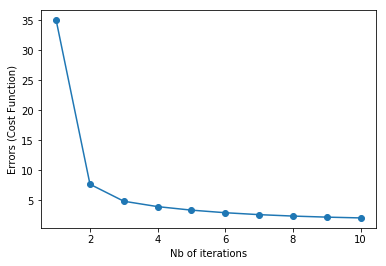

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1,stratify=y)

adal = Adaline(eta=0.01,n_iter=10).fit(X_train_std,y_train)
y_pred=adal.predict(X_test_std)

plt.plot(range(1, len(adal.cost_) + 1), adal.cost_, marker='o')
plt.xlabel('Nb of iterations')
plt.ylabel('Errors (Cost Function)')
plt.show()

In [33]:
print('Missclassified samples: %d' %(y_test!=y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

Missclassified samples: 0
Accuracy: 1.00


With a properly chosen learning rate η , the Adaline algorithm converges and gives a better prediction accuracy than the perceptron algorithm